# Getting to know the data

Understanding the data is a foundational step in any machine learning project and is crucial for achieving reproducibility in research. 

One of the primary reasons why getting to know the data is essential is its direct impact on the reliability and generalizability of the machine learning models. We can identify potential biases, anomalies, or inconsistencies that may affect model performance by exploring the data. 

This understanding enables us to apply appropriate preprocessing techniques, such as [handling missing values](#data-cleaning), [addressing class imbalances](/notebooks/1-model-evaluation.html#stratification), or [feature normalisation](#pre-processing), to ensure that the model learns meaningful patterns from the data.

Moreover, gaining insights into the data can guide us as researchers in selecting the most appropriate algorithms and architectures for these tasks. Understanding the distribution and relationships within the data allows us to choose well-suited models to capture complex patterns and make accurate predictions.

This tutorial uses the [Palmer Penguins dataset](https://allisonhorst.github.io/palmerpenguins/). Data were collected and made available by [Dr. Kristen Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php) and the [Palmer Station, Antarctica LTER](https://pallter.marine.rutgers.edu/), a member of the [Long Term Ecological Research Network](https://lternet.edu/).

Let's dive into some quick exploration of the data!

In [2]:
from pathlib import Path

DATA_FOLDER = Path("..", "..") / "data"
DATA_FILEPATH = DATA_FOLDER / "penguins.csv"

We'll use the `pandas` library to load an pre-process the data. It has quite a few convenience functions like loading CSVs or dropping columns. 

In [3]:
import pandas as pd

In [4]:
penguins_raw = pd.read_csv(DATA_FILEPATH)
penguins_raw.head()

studyName  Sample Number                              Species  Region  \
0   PAL0708              1  Adelie Penguin (Pygoscelis adeliae)  Anvers   
1   PAL0708              2  Adelie Penguin (Pygoscelis adeliae)  Anvers   
2   PAL0708              3  Adelie Penguin (Pygoscelis adeliae)  Anvers   
3   PAL0708              4  Adelie Penguin (Pygoscelis adeliae)  Anvers   
4   PAL0708              5  Adelie Penguin (Pygoscelis adeliae)  Anvers   

      Island               Stage Individual ID Clutch Completion    Date Egg  \
0  Torgersen  Adult, 1 Egg Stage          N1A1               Yes  2007-11-11   
1  Torgersen  Adult, 1 Egg Stage          N1A2               Yes  2007-11-11   
2  Torgersen  Adult, 1 Egg Stage          N2A1               Yes  2007-11-16   
3  Torgersen  Adult, 1 Egg Stage          N2A2               Yes  2007-11-16   
4  Torgersen  Adult, 1 Egg Stage          N3A1               Yes  2007-11-16   

   Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g)  \
0                39.1               18.7                181.0         3750.0   
1                39.5               17.4                186.0         3800.0   
2                40.3               18.0                195.0         3250.0   
3                 NaN                NaN                  NaN            NaN   
4                36.7               19.3                193.0         3450.0   

      Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  \
0    MALE                NaN                NaN   
1  FEMALE            8.94956          -24.69454   
2  FEMALE            8.36821          -25.33302   
3     NaN                NaN                NaN   
4  FEMALE            8.76651          -25.32426   

                         Comments  
0  Not enough blood for isotopes.  
1                             NaN  
2                             NaN  
3              Adult not sampled.  
4                             NaN

We can see that this dataset has a lot more potential than your usual "toy dataset". We get the full provenance of this data including the study a penguin was measured in, where it lives, and even comments by the researchers collecting the data!

And honestly, this looks like a lot. Some of these variables might actually leak information, like the location or study number telling us what penguin colony was sampled.

Let's reduce this to some numerical columns `Culmen Length (mm)`, `Culmen Depth (mm)`, `Flipper Length (mm)`, then `Sex` as a categorical value in case penguins exhibit [sexual dimorphism](https://en.wikipedia.org/wiki/Sexual_dimorphism) and the `species` as our target column to make it easier for us.

In [5]:
num_features = ["Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)"]
cat_features = ["Sex"]
features = num_features + cat_features
target = ["Species"]
penguins = penguins_raw[features+target]
penguins

Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)     Sex  \
0                  39.1               18.7                181.0    MALE   
1                  39.5               17.4                186.0  FEMALE   
2                  40.3               18.0                195.0  FEMALE   
3                   NaN                NaN                  NaN     NaN   
4                  36.7               19.3                193.0  FEMALE   
..                  ...                ...                  ...     ...   
339                55.8               19.8                207.0    MALE   
340                43.5               18.1                202.0  FEMALE   
341                49.6               18.2                193.0    MALE   
342                50.8               19.0                210.0    MALE   
343                50.2               18.7                198.0  FEMALE   

                                       Species  
0          Adelie Penguin (Pygoscelis adeliae)  
1          Adelie Penguin (Pygoscelis adeliae)  
2          Adelie Penguin (Pygoscelis adeliae)  
3          Adelie Penguin (Pygoscelis adeliae)  
4          Adelie Penguin (Pygoscelis adeliae)  
..                                         ...  
339  Chinstrap penguin (Pygoscelis antarctica)  
340  Chinstrap penguin (Pygoscelis antarctica)  
341  Chinstrap penguin (Pygoscelis antarctica)  
342  Chinstrap penguin (Pygoscelis antarctica)  
343  Chinstrap penguin (Pygoscelis antarctica)  

[344 rows x 5 columns]

Much easier to deal with for a non-expert in Penguin studies!

## Data Visualization

Data visualization is indispensable for effective data exploration in machine learning research. 

We can quickly grasp the datasets' distribution, relationships, and anomalies through visual representations like scatter plots, histograms, and box plots. These visualizations provide invaluable insights into the underlying structure of the data, enabling researchers to identify patterns, trends, and outliers that may influence model performance. 

Moreover, visualizations facilitate collaboration and communication among team members, as they provide intuitive ways to convey complex insights and findings. 

In essence, data visualization is a cornerstone of data exploration, enhancing the reproducibility and reliability of machine learning research by enabling researchers to gain a deeper understanding of their datasets.

For this visualization we'll use `seaborn` which is a statistical plotting library that makes our job much easier than the more granular `matplotlib`.

c:\Users\Jesper\Github\ml-for-science-reproducibility-tutorial\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Jesper\Github\ml-for-science-reproducibility-tutorial\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Jesper\Github\ml-for-science-reproducibility-tutorial\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


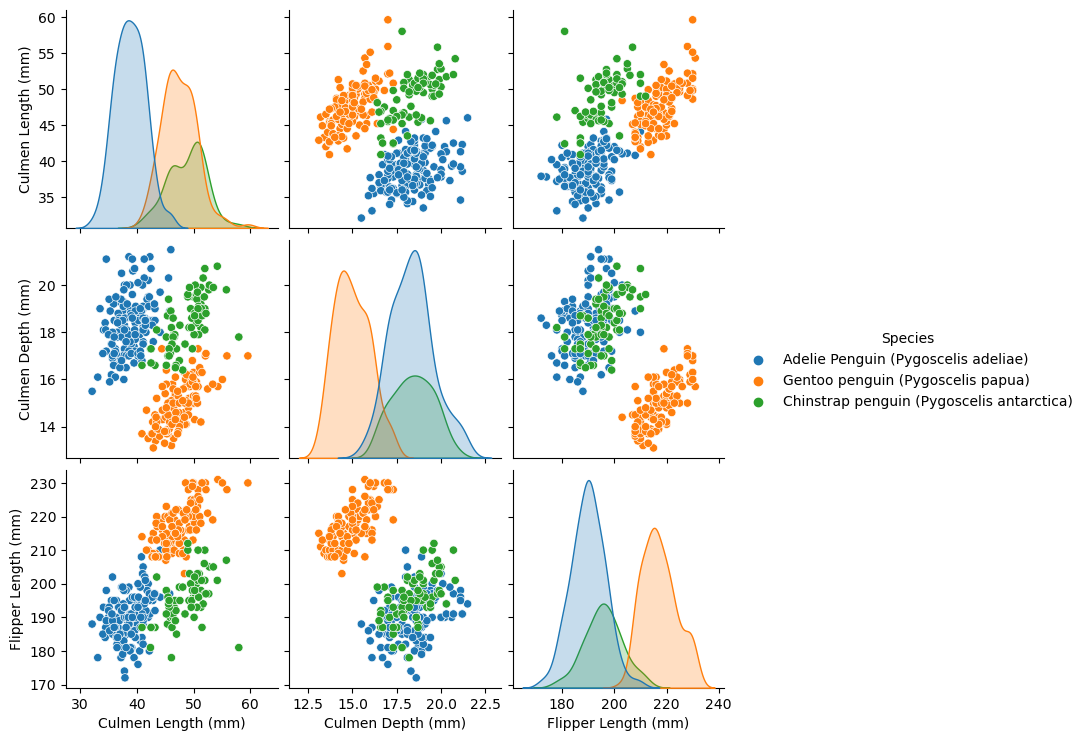

In [6]:
import seaborn as sns

pairplot_figure = sns.pairplot(penguins, hue="Species")

Looks like we're getting some good separation of the clusters already!

This promises to be a good dataset for fairly simple machine learning algorithms.

## Data cleaning

That means we can probably do some cleaning and get ready to build some good machine learning models.

Dropping NaNs, or missing values, during the data cleaning process is the most basic form of cleaning data. Some machine learning algorithms can actually process NaNs, which is a great way to deal with missing data, but in our case we're choosing the simplest way. Don't take this as the best practice though!

By removing rows or columns containing NaNs, researchers can prevent these issues and ensure that their models learn from complete and consistent data. While imputation techniques exist to fill in missing values, dropping NaNs is often preferred when the proportion of missing values is small relative to the dataset size or when imputation could introduce inaccuracies.

Sometimes we can even gain information from NaNs, when they're not "missing at random". Then we can actually pre-process the data by adding a boolean feature that encodes the "missingness" of a variable and use mean imputation on the data column.

In [7]:
penguins = penguins.dropna(axis='rows')
penguins

Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)     Sex  \
0                  39.1               18.7                181.0    MALE   
1                  39.5               17.4                186.0  FEMALE   
2                  40.3               18.0                195.0  FEMALE   
4                  36.7               19.3                193.0  FEMALE   
5                  39.3               20.6                190.0    MALE   
..                  ...                ...                  ...     ...   
339                55.8               19.8                207.0    MALE   
340                43.5               18.1                202.0  FEMALE   
341                49.6               18.2                193.0    MALE   
342                50.8               19.0                210.0    MALE   
343                50.2               18.7                198.0  FEMALE   

                                       Species  
0          Adelie Penguin (Pygoscelis adeliae)  
1          Adelie Penguin (Pygoscelis adeliae)  
2          Adelie Penguin (Pygoscelis adeliae)  
4          Adelie Penguin (Pygoscelis adeliae)  
5          Adelie Penguin (Pygoscelis adeliae)  
..                                         ...  
339  Chinstrap penguin (Pygoscelis antarctica)  
340  Chinstrap penguin (Pygoscelis antarctica)  
341  Chinstrap penguin (Pygoscelis antarctica)  
342  Chinstrap penguin (Pygoscelis antarctica)  
343  Chinstrap penguin (Pygoscelis antarctica)  

[334 rows x 5 columns]

In [8]:
DATA_CLEAN_FILEPATH = DATA_FOLDER / "penguins_clean.csv"

penguins.to_csv(DATA_CLEAN_FILEPATH, index=False)

Not too bad it looks like we lost ten rows. That's manageable, it's a toy dataset after all.

So let's build a small model to classify penguins!

## Machine Learning

First, it's essential to split the data into separate sets for training and testing purposes. 

This split enables us to evaluate the performance of our machine learning model effectively. By training the model on a portion of the data and testing it on unseen data, we can assess whether the model has learned generalizable patterns or has simply memorized the training examples.

When a model that fails to generalize to unseen data this is known as overfitting. Overfitting is a phenomenon where the model performs well on the training data but fails on non-training data. Overfitting leads to poor performance and unreliable predictions in real-world scenarios. 

Therefore, by splitting the data, we can detect and mitigate overfitting, ensuring that our model learns meaningful patterns that generalize to unseen data.

We'll choose 70% of the data as training data here:

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(penguins[features], penguins[target], train_size=.7)
X_train

ModuleNotFoundError: No module named 'sklearn'

In [9]:
y_train

NameError: name 'y_train' is not defined

Now we can build a machine learning model.

Here we'll use the scikit-learn pipeline model. 
This makes it really easy for us to train prepocessors and models on the training data alone and cleanly apply to the test data set without leakage.


### Pre-processing

Pre-processing data is the next critical step in preparing it for machine learning models, and the scikit-learn library offers powerful tools like `StandardScaler` and `OneHotEncoder` to facilitate this process. 

The `StandardScaler` is commonly used to standardize features by removing the mean and scaling them to unit variance, ensuring that each feature contributes equally to the model's performance. This transformation is particularly beneficial for algorithms sensitive to feature scaling, such as support vector machines and k-nearest neighbours. 

On the other hand, OneHotEncoder is instrumental in handling categorical variables by converting them into a binary representation, where each category becomes a binary feature. This transformation prevents the model from interpreting categorical variables as ordinal, e.g. category `1` is "stronger" than category `0`, and ensures that all categories are treated equally.

Together, these pre-processing techniques help enhance the performance and robustness of machine learning models, ready to be fed into the model for training and evaluation.

<div class="alert alert-block alert-info">
<b>Tip:</b> In science, any type of feature selection, scaling, basically anything you do to the data, needs to be done <strong>after</strong> a split into training and test set.<br>Statistically and scientifically valid results come from proper treatment of our data. Unfortunately, we can overfit manually if we don't split out a test set before pre-processing.</div>

In [10]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')

ModuleNotFoundError: No module named 'sklearn'

The `ColumnTransformer` is a neat tool that can apply your preprocessing steps to the right columns in your dataset. 

This transformer is pretty efficient because it allows us to target individual subsets of data for transformation, ensuring that preprocessing techniques are applied only where necessary. 

Moreover, leveraging a Pipeline instead of a standalone `StandardScaler` or `ColumnTransformer` offers even greater flexibility, enabling the integration of more intricate preprocessing workflows, which we'll see further below. This versatility is particularly valuable when working on complex machine learning tasks that demand comprehensive preprocessing strategies beyond the scope of basic projects, enabling researchers to unleash the full potential of their data.

In [11]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

ModuleNotFoundError: No module named 'sklearn'

Ok now we'll build a reproducible `Pipeline` including a support-vector machine as the classifier!

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC()),
])
model

ModuleNotFoundError: No module named 'sklearn'

We can see a nice model representation here.

You can click on the different modules that will tell you which arguments were passed into the pipeline. In our case, how we handle unknown values in the OneHotEncoder.

The `Pipeline` offers a convenient solution to prevent unintentional leakage of information from test data during preprocessing. By encapsulating preprocessing steps within a pipeline, each transformation is applied sequentially and independently to the data, ensuring that normalizers and other preprocessing techniques are fitted solely on the training data. 

This prevents the inadvertent fitting of preprocessors to the test data, mitigating the risk of information leakage and preserving the integrity of the evaluation process. One way to avoid accidents in our research!

### Model Training

Now it's time to fit our Support-Vector Machine to our training data.

This process involves training the model on the provided training data to learn patterns and relationships within the features and their corresponding labels. During the fitting process, the model adjusts its parameters to minimize the difference between its predictions and the actual target values. 

The `.fit()` method encapsulates this training process, allowing the model to learn from the training data and prepare for subsequent evaluation and prediction tasks. 

(And it's all in the `Pipeline`, which makes sure our pre-processors get fitted to the same exact data!)

In [ ]:
model.fit(X_train, y_train[target[0]])

NameError: name 'model' is not defined

We can see that we get a decent score on the training data.

This metric only tells us how well the model can perform on the data it has seen, we don't know anything about generalization and actual "learning" yet.

In [14]:
model.score(X_train, y_train)

NameError: name 'model' is not defined

To evaluate how well our model learned, we check the model against the test data one final time.
<div class="alert alert-block alert-info">
<b>Tip:</b> It is possible to manually overfit a model to the test set, by tweaking the pipelines based on the test score.<br>This invalidates scientific results and must be avoided. If you need to manually tweak the model, use a three-way `train-val-test` split.<br>Only evaluate on the test set once!</div>

In [15]:
model.score(X_test, y_test)

NameError: name 'model' is not defined

That's an extraordinary score! 

We can predict our penguins with 100%, so let's evaluate these models in the following pages!